In [1]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pieces_raw = """
####

.#.
###
.#.

..#
..#
###

#
#
#
#

##
##
""".strip().split('\n\n')

In [3]:
pieces = []
for piece in pieces_raw:
    piece = np.array([[int(x) for x in list(p)] for p in piece.replace('.', '0').replace('#', '1').split('\n')])
    pieces.append(piece[::-1,:])


In [4]:
test = """
>>><<><>><<<>><>>><<<>>><<<><<<>><>><<>>
""".strip()

In [5]:
with open('input.txt', 'r') as f:
    input_ = f.read().strip()

# Part 1

In [6]:
h = 30
empty_field = np.zeros((h, 9))
empty_field[:, 0] = 1
empty_field[:, -1] = 1
empty_field[0, :] = 1

In [9]:
test

'>>><<><>><<<>><>>><<<>>><<<><<<>><>><<>>'

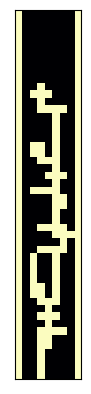

In [18]:
jets = input_

h = 4000
empty_field = np.zeros((h, 9))
empty_field[:, 0] = 1
empty_field[:, -1] = 1
empty_field[0, :] = 1
field = empty_field.copy()
f = field.copy()

low = 1
piece_idx = -1
jets_idx = -1
tot_flow = 0
images = []
fig, ax = plt.subplots()
for _ in range(2022):
    piece_idx = (piece_idx + 1) % len(pieces)
    piece = pieces[piece_idx]
    piece_sh = piece.shape
    piece_pos = [low + 3, 3]

    f = field.copy()
    f[piece_pos[0]:piece_pos[0]+piece_sh[0], piece_pos[1]:piece_pos[1]+piece_sh[1]] = piece * 2

    while True:
        t_pos = list(piece_pos)
        jets_idx = (jets_idx + 1) % len(jets)

        # move with jets
        f = field.copy()

        if jets[jets_idx] == '>':
            t_pos[1] += 1
        elif jets[jets_idx]:
            t_pos[1] -= 1

        f[t_pos[0]:t_pos[0]+piece_sh[0], t_pos[1]:t_pos[1]+piece_sh[1]] += piece * 2
        if (f > 2).any():
            pass
        else:
            piece_pos = t_pos

        # try moving down
        t_pos = list(piece_pos)
        f = field.copy()
        t_pos[0] -= 1
        
        f[t_pos[0]:t_pos[0]+piece_sh[0], t_pos[1]:t_pos[1]+piece_sh[1]] += piece * 2
        if (f > 2).any():
            break
        else:
            piece_pos = t_pos


    low = max(low, piece_pos[0] + piece_sh[0])
    field[piece_pos[0]:piece_pos[0]+piece_sh[0], piece_pos[1]:piece_pos[1]+piece_sh[1]] += piece
    #print(_)
    im = plt.imshow(field[max(0, low-40):max(100, low+10)], origin='lower', cmap='magma', animated=True, aspect=1)
    plt.xticks([], [])
    plt.yticks([], [])
    images.append([im])


In [19]:
ani = animation.ArtistAnimation(fig, images, interval=10, blit=True,
                                repeat_delay=1000)
ani.save('tetris.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


In [15]:
tot_flow + low - 1

3171

# Part 2

In [166]:
jets = input_

h = 4000
empty_field = np.zeros((h, 9))
empty_field[:, 0] = 1
empty_field[:, -1] = 1
empty_field[0, :] = 1
field = empty_field.copy()
f = field.copy()

low = 1
piece_idx = -1
jets_idx = -1
seen = {}
lows = {}
tot_low = 0
for n in range(100000):
    if low >= h - 8:
        tot_low += h - 30
        print(tot_low, low)
        new_field = np.zeros((h, 9))
        new_field[:, 0] = 1
        new_field[:, -1] = 1
        new_field[:30, :] = field[-30:, :]
        field = new_field
        low = low - (h - 30)
    piece_idx = (piece_idx + 1) % len(pieces)
    piece = pieces[piece_idx]
    piece_sh = piece.shape
    piece_pos = [low + 3, 3]

    f = field.copy()
    f[piece_pos[0]:piece_pos[0]+piece_sh[0], piece_pos[1]:piece_pos[1]+piece_sh[1]] = piece * 2

    while True:
        t_pos = list(piece_pos)
        jets_idx = (jets_idx + 1) % len(jets)

        # move with jets
        f = field.copy()

        if jets[jets_idx] == '>':
            t_pos[1] += 1
        elif jets[jets_idx]:
            t_pos[1] -= 1
        #print(t_pos)
        f[t_pos[0]:t_pos[0]+piece_sh[0], t_pos[1]:t_pos[1]+piece_sh[1]] += piece * 2
        if (f > 2).any():
            pass
        else:
            piece_pos = t_pos

        # try moving down
        t_pos = list(piece_pos)
        f = field.copy()
        t_pos[0] -= 1
        
        f[t_pos[0]:t_pos[0]+piece_sh[0], t_pos[1]:t_pos[1]+piece_sh[1]] += piece * 2
        if (f > 2).any():
            #print('BREAK')
            break
        else:
            piece_pos = t_pos


    low = max(low, piece_pos[0] + piece_sh[0])
    field[piece_pos[0]:piece_pos[0]+piece_sh[0], piece_pos[1]:piece_pos[1]+piece_sh[1]] += piece

    signature = (tuple(field[low-20:low].ravel()), piece_idx, jets_idx)
    if signature in seen:
        print('GOT IT', tot_low + low, n, seen[signature])
        break
    else:
        seen[signature] = (tot_low + low, n)
    lows[n] = low

3970 3993
GOT IT 4071 2583 (1342, 863)


Test

In [159]:
delta_n = 61 - 26
dist = 101 - 48

In [160]:
target = 1000000000000 - 26
target // delta_n, target % delta_n

(28571428570, 24)

In [162]:
lows[26] + target // delta_n * dist + lows[26 + target % delta_n] - lows[26] - 2

1514285714288

Input

In [167]:
delta_n = 2583 - 863
dist = 4071 - 1342

In [168]:
target = 1000000000000 - 863 
target // delta_n, target % delta_n

(581395348, 577)

In [169]:
lows[863] + target // delta_n * dist + lows[863 + target % delta_n] - lows[863] -2

1586627906921